# Setup
Setting up the simulation requires the following data/configuration:
#### [Cluster generation](#cluster_generation)
Using `hpconfig` either as a JSON creator, or to produce an intermediary dictionary (preferred)

#### [Observation schedule generation ](#observation_generation) (In Progress)
Observations schedule describes the ingest and data that will be moving across the system during the simulation 

#### [Pipeline generation](#pipeline_generation) (In Progress)
   * `topsim_pipelines` will generate costs for the workflows that match for the HPSOs in the observation schedule

#### [Telescope generation](#telescope_generation)

Telescope configuration: Information on what the size of the instrument (e.g. number of antennas, number of resources used at Ingest, and descriptions of the pipelines that are used during ingest).
    * Telescope generation occurs at the end of the process, as it involves wrapping all the other dictionaries into one final JSON-serializable dictionary
    
#### [Simulation Visualisation](#sim_vis)

In [4]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../thesis_experiments'))
sys.path.insert(0, os.path.abspath('../../topsim_pipelines'))

## Cluster generation<a id=cluster_generation></a>
Cluster generation is acheived through the `hpconfig` tool, which provides a command-line interface, or a class-based approach to producing a JSON-ready dictionary:

In [4]:
from hpconfig.specs.pawsey.galaxy import GalaxyNoGPU
cluster = GalaxyNoGPU().create_config_dict()
# Let's see what the cluster looks like
cluster['cluster']['header']

{'time': 'false',
 'generator': 'hpconfig',
 'architecture': {'cpu': {'XeonIvyBridge': 50, 'XeonSandyBridge': 100},
  'gpu': {}}}

## Observation generation

The mid-term schedule is formed by a list of observations, each of which is assocated with a HPSO and corresponding processing pipeline(s). The challenge we have in this situation is that observation scheduling for telescopes is non-trivial (it is another scheduling problem in NP), and the constraints and observation details for the SKA are still to be decided. For the purpose of TOpSim and these experiments, we need to demonstrate how different combinations of observations in a schedule are will look on the system; this could be done randomly, or with specific scheduling constraints imposed on a sequence of observations. 

We need to translated each of these into something like: 

In [5]:
"""
"observations": [
    {
    "name": "observation1",
    "start": 0,
    "duration": 30, # Time is in minutes, 0.1 of 5hours 
    "demand": 36,
    "workflow": "drepa_worklow_config_file.json",
    "type": "drepa",
    "data_product_rate": 3.79 ## This is petaflops/minute
    },
    ....
"""

'\n"observations": [\n    {\n    "name": "observation1",\n    "start": 0,\n    "duration": 30, # Time is in minutes, 0.1 of 5hours \n    "demand": 36,\n    "workflow": "drepa_worklow_config_file.json",\n    "type": "drepa",\n    "data_product_rate": 3.79 ## This is petaflops/minute\n    },\n    ....\n'

## Pipeline Generation<a id=pipeline_generation></a>
Pipeline generation involves the following steps:

1. Use the [EAGLE](https://eagle.icrar.org) online editor to produce a Logical Graph Template (LGT). 
    * Important to set the required number of major/minor cycles that will occur prior to next steps. 
2. Translate the LGT to a Physical Graph Template (an unrolled, unscheduled graph) using [DALiUGE](https://github.com/icrar/daliuge)
3. Based on observation requirements, set the number of majo

## Simulation Visualisation<a id=sim_vis></a>

In [2]:
import os
import logging
import simpy
import time

In [5]:
from topsim.core.simulation import Simulation
from topsim.core.delay import DelayModel
from user.telescope import Telescope
from user.scheduling import GreedyAlgorithmFromPlan

In [8]:
logging.basicConfig(level="DEBUG")
LOGGER = logging.getLogger(__name__)

os.chdir('/home/rwb/github/thesis_experiments')
fseries = 'visualisation_playground/series_observations.json'
fparallel =  'visualisation_playground/parallel_observations.json'
config = [fseries,fparallel]
env = simpy.Environment()
instrument = Telescope
timestamp = f'{time.time()}'.split('.')[0]
simulation = Simulation(
    env=env,
    config=fseries,
    instrument=instrument,
    planning='heft',
    scheduling=GreedyAlgorithmFromPlan,
    delay=None,
    timestamp={timestamp}
)
sim, tasks = simulation.start()


KeyError: 'emu1'

In [5]:
os.chdir('/home/rwb/github/thesis_experiments')


In [12]:
ls visualisation_playground/results

mos_sw20_lw40.json-1619683271-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw20_lw40.json-1619683271-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw30_lw40.json-1619683566-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw30_lw40.json-1619683566-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw30_lw40.json-1619683587-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw30_lw40.json-1619683587-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw40_lw80.json-1619680221-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw40_lw80.json-1619680221-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw50_lw100.json-1619681375-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw50_lw100.json-1619681375-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_observations.json-1619702848-heft-GreedyAlgorithmFromPlan-sim.pkl
parallel_observations.json-1619702848-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-sim.pkl
parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_obser

In [6]:
logging.basicConfig(level="INFO")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

DEBUG:matplotlib:$HOME=/home/rwb
DEBUG:matplotlib:CONFIGDIR=/home/rwb/.config/matplotlib
DEBUG:matplotlib:matplotlib data path: /home/rwb/github/topsim/venv/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /home/rwb/github/topsim/venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.1.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'impor

DEBUG:matplotlib:CACHEDIR=/home/rwb/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/rwb/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [7]:
series = "visualisation_playground/results/series_observations.json-1619744647-heft-GreedyAlgorithmFromPlan-sim.pkl"
parallel = "visualisation_playground/results/parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-sim.pkl"
series_df = pd.read_pickle(series)
parallel_df = pd.read_pickle(parallel)

In [ ]:
series_df[series_df['available_resources']>]

Text(0, 0.5, 'Scheduler allocation Time (s)')

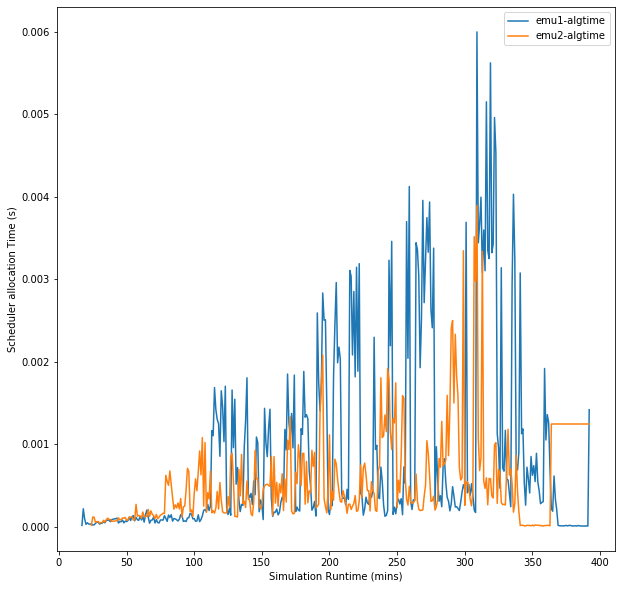

In [10]:
ax = series_df[['emu1-algtime','emu2-algtime']].plot(figsize=(10,10))
ax.set_xlabel("Simulation Runtime (mins)")
ax.set_ylabel("Scheduler allocation Time (s)")

In [5]:
parallel_df[['emu1-algtime','emu2-algtime']].plot()

NameError: name 'parallel_df' is not defined

In [ ]:
series_tasks_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1619744647-heft-GreedyAlgorithmFromPlan-tasks.pkl")
series_tasks_df = series_tasks_df.T

series_tasks_df['time_diff'] = series_tasks_df['aft']-series_tasks_df['eft']


In [167]:
series_sim_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1620100399-heft-GreedyAlgorithmFromPlan-sim.pkl")
parallel_sim_df = pd.read_pickle("visualisation_playground/results/parallel_observations.json-1620100412-heft-GreedyAlgorithmFromPlan-sim.pkl")

series_tasks_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1620100399-heft-GreedyAlgorithmFromPlan-tasks.pkl")
parallel_tasks_df = pd.read_pickle("visualisation_playground/results/parallel_observations.json-1620100412-heft-GreedyAlgorithmFromPlan-tasks.pkl")

series_tasks_df = series_tasks_df.T
parallel_tasks_df = parallel_tasks_df.T

series_tasks_df['time_diff'] = series_tasks_df['aft']-series_tasks_df['ast']
series_tasks_df['time_diff'] = series_tasks_df['time_diff'].astype('float')
parallel_tasks_df['time_diff'] = parallel_tasks_df['aft']-parallel_tasks_df['ast']
parallel_tasks_df['time_diff'] = parallel_tasks_df['time_diff'].astype('float')

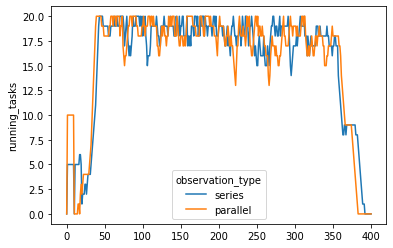

In [174]:
# fig, axs = plt.subplots(ncols=2)
# axs[0].set_title('Series observations')
# axs[1].set_title('Parallel observations')
# sns.kdeplot(data=series_tasks_df,x='time_diff',hue='observation_id', fill=True,ax=axs[0])
# sns.kdeplot(data=parralell_tasks_df,x='time_diff',hue='observation_id', fill=True,ax=axs[1])
dflist = [series_sim_df, parallel_sim_df]
xaxis = [x for x in range(0,2*401)]
for df in dflist:
    tmp = [x for x in range(len(df),401)]
    for x in tmp:
        df.loc[x] = 0
dflist[1]
dflist[0]['observation_type'] = 'series'
dflist[1]['observation_type'] = 'parallel'

dfcombined = dflist[0].append(dflist[1])
dfcombined
sns.lineplot(data=dfcombined, x=dfcombined.index, y=dfcombined['running_tasks'],hue='observation_type')
# # sns.lineplot(data=dflist[1], x=xaxis, y=dflist[1]['running_tasks'])

In [ ]:
dfcombined

512/4 = 4 different arrays
long and short baselines in the observations.
i/o for task duration 

Task duration currently FLOPS/
Preprocessing for task cost FLOPS/byte 
Runtime presentation

hot buffer : cold buffer = 9:1 